# Task
hazme una EDA completo

Here is all the data you need:
"sales_data.csv"

## Data loading

### Subtask:
Load the sales data from the provided CSV file.


**Reasoning**:
Load the sales data from the provided CSV file into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

sales_df = pd.read_csv('sales_data.csv')
display(sales_df.head())

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


## Data exploration

### Subtask:
Explore the loaded sales data to understand its characteristics.


**Reasoning**:
Examine the shape, data types, descriptive statistics, missing values, and distributions of key variables in the sales data.  Also, explore the relationship between 'Units Sold' and other relevant variables.



Shape of the DataFrame: (76000, 16)

Data Types:
 Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Price                 float64
Discount                int64
Weather Condition      object
Promotion               int64
Competitor Pricing    float64
Seasonality            object
Epidemic                int64
Demand                  int64
dtype: object

Descriptive Statistics:
        Inventory Level    Units Sold  Units Ordered         Price  \
count     76000.000000  76000.000000   76000.000000  76000.000000   
mean        301.062842     88.827316      89.090645     67.726028   
std         226.510161     43.994525     162.404627     39.377899   
min           0.000000      0.000000       0.000000      4.740000   
25%         136.000000     58.000000       0.000000     31.997500   
50%         227.

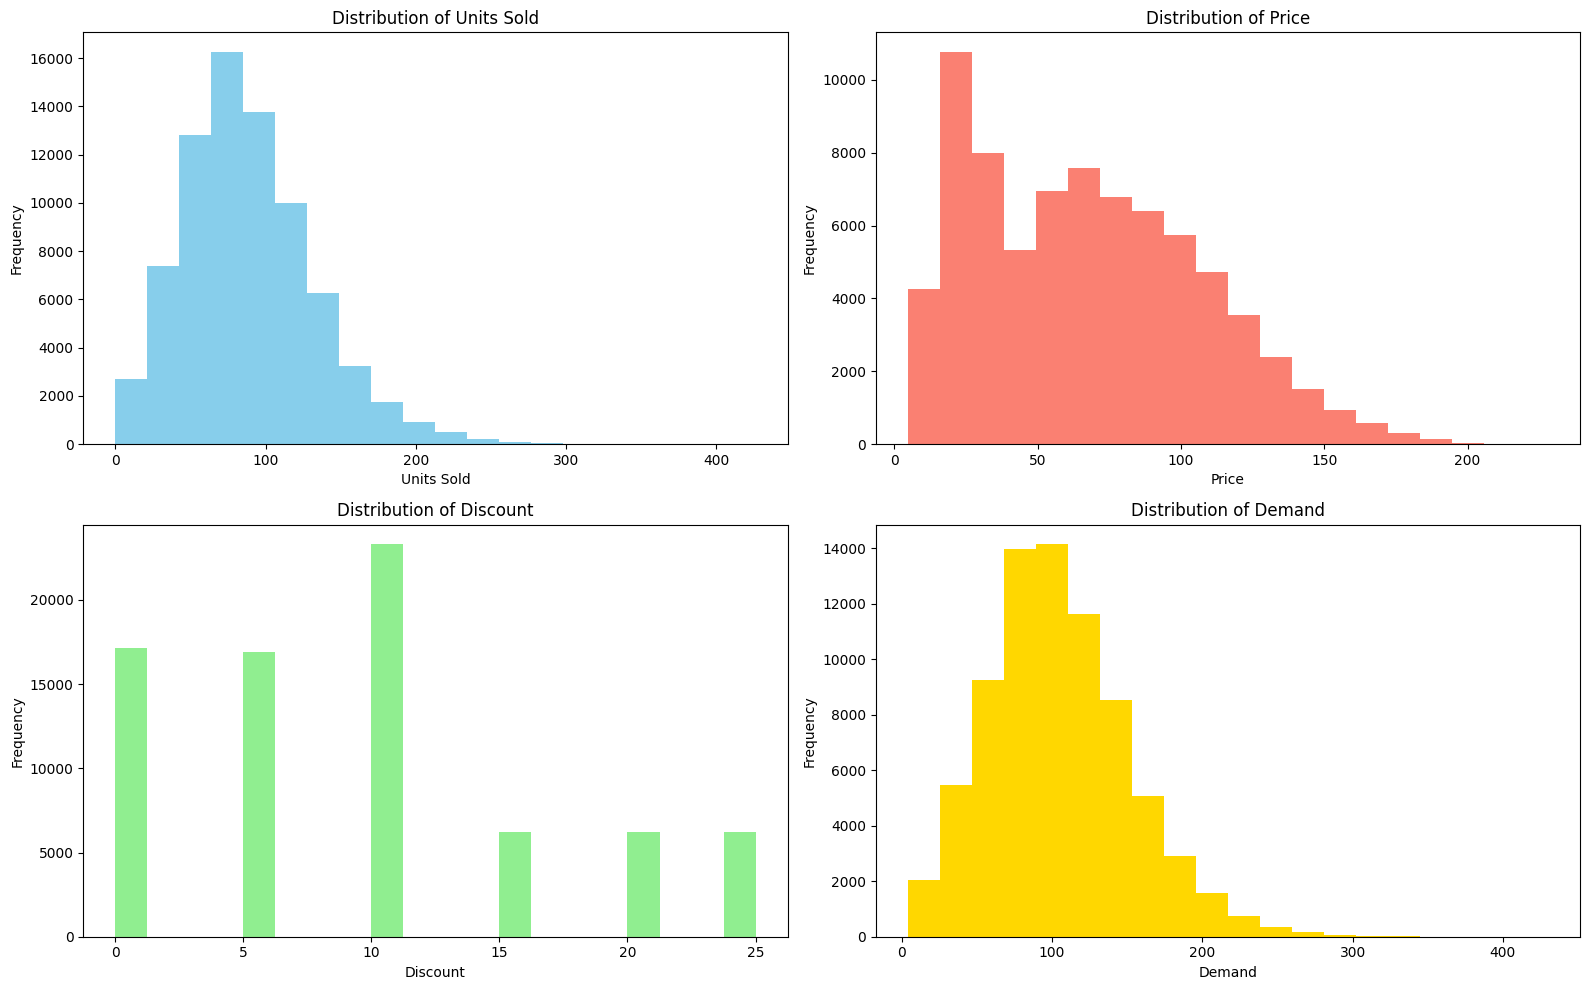


Correlation between 'Units Sold' and other variables:
             Units Sold     Price  Discount    Demand
Units Sold    1.000000 -0.014506  0.183523  0.833421
Price        -0.014506  1.000000 -0.094136 -0.023461
Discount      0.183523 -0.094136  1.000000  0.224723
Demand        0.833421 -0.023461  0.224723  1.000000


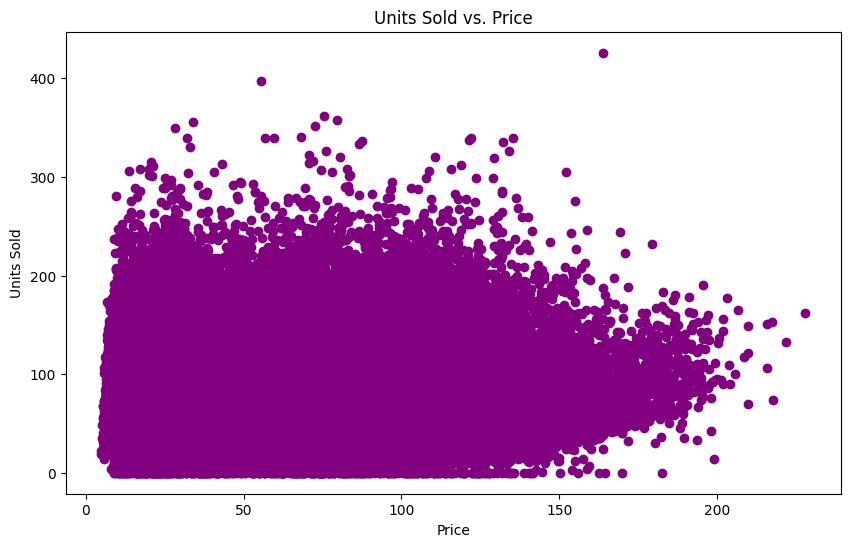

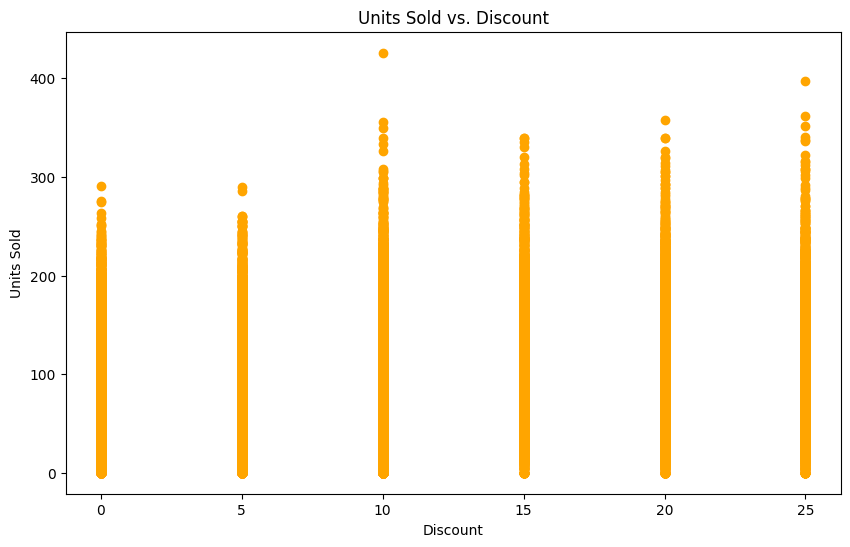

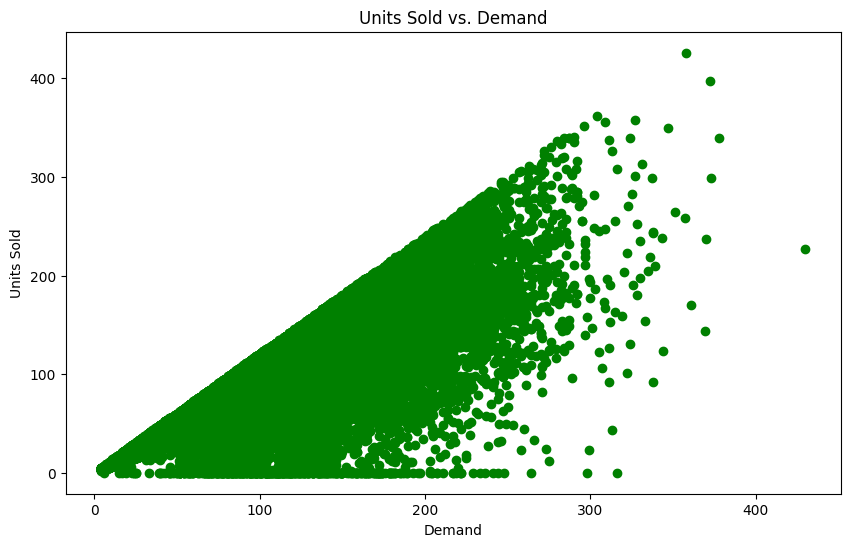

In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", sales_df.shape)

# Check data types of each column
print("\nData Types:\n", sales_df.dtypes)

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", sales_df.describe())

# Identify missing values
print("\nMissing Values:\n", sales_df.isnull().sum())
print("\nPercentage of Missing Values:\n", (sales_df.isnull().sum() / len(sales_df)) * 100)

# Analyze the distribution of key variables
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.hist(sales_df['Units Sold'], bins=20, color='skyblue')
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')


plt.subplot(2, 2, 2)
plt.hist(sales_df['Price'], bins=20, color='salmon')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(sales_df['Discount'], bins=20, color='lightgreen')
plt.title('Distribution of Discount')
plt.xlabel('Discount')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(sales_df['Demand'], bins=20, color='gold')
plt.title('Distribution of Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Explore the relationship between 'Units Sold' and other variables
print("\nCorrelation between 'Units Sold' and other variables:\n", sales_df[['Units Sold', 'Price', 'Discount', 'Demand']].corr())

plt.figure(figsize=(10, 6))
plt.scatter(sales_df['Price'], sales_df['Units Sold'], color='purple')
plt.title('Units Sold vs. Price')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(sales_df['Discount'], sales_df['Units Sold'], color='orange')
plt.title('Units Sold vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Units Sold')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(sales_df['Demand'], sales_df['Units Sold'], color='green')
plt.title('Units Sold vs. Demand')
plt.xlabel('Demand')
plt.ylabel('Units Sold')
plt.show()

## Data cleaning

### Subtask:
Clean the sales data by handling potential outliers and data type conversions.


**Reasoning**:
Convert the 'Date' column to datetime format and handle outliers in numerical features using the IQR method.



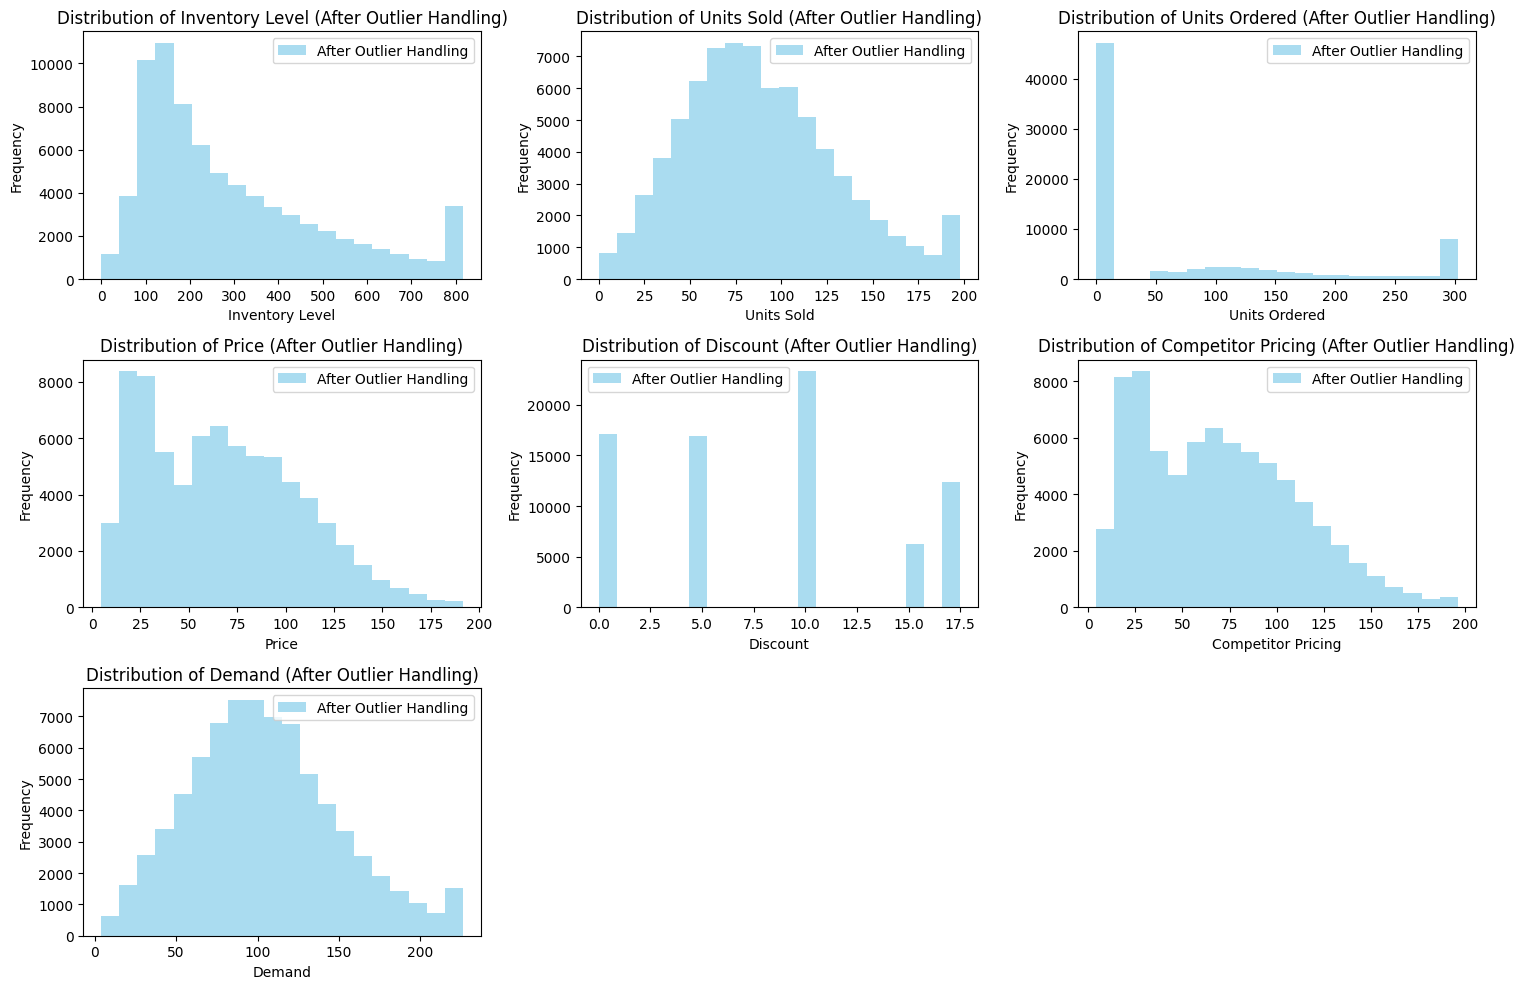

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Numerical features for outlier detection
numerical_features = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount', 'Competitor Pricing', 'Demand']

# Detect and handle outliers using IQR
for col in numerical_features:
    Q1 = sales_df[col].quantile(0.25)
    Q3 = sales_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    sales_df[col] = sales_df[col].clip(lower=lower_bound, upper=upper_bound)


# Visualize distributions before and after outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    plt.hist(sales_df[col], bins=20, color='skyblue', alpha=0.7, label='After Outlier Handling')
    plt.title(f'Distribution of {col} (After Outlier Handling)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

## Data wrangling

### Subtask:
Create new features and transform existing ones in the sales DataFrame.


**Reasoning**:
Create new features 'Month' and 'DayOfWeek' from the 'Date' column, create an interaction feature 'PriceDiscountInteraction', and group 'Weather Condition' categories.



In [ ]:
# Engineer 'Month' and 'DayOfWeek' features
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['DayOfWeek'] = sales_df['Date'].dt.dayofweek

# Create 'PriceDiscountInteraction' feature
sales_df['PriceDiscountInteraction'] = sales_df['Price'] * sales_df['Discount']

# Group 'Weather Condition' categories (example grouping)
weather_mapping = {
    'Snowy': 'Cold',
    'Sunny': 'Warm',
    'Cloudy': 'Moderate',
    'Rainy': 'Wet',
    'Foggy': 'Moderate'
}
sales_df['Weather Condition'] = sales_df['Weather Condition'].map(weather_mapping)

display(sales_df.head())

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand,Month,DayOfWeek,PriceDiscountInteraction
0,2022-01-01,S001,P0001,Electronics,North,195,102,252.0,72.72,5.0,Cold,0,85.73,Winter,0,115,1,5,363.6
1,2022-01-01,S001,P0002,Clothing,North,117,117,249.0,80.16,15.0,Cold,1,92.02,Winter,0,226,1,5,1202.4
2,2022-01-01,S001,P0003,Clothing,North,247,114,302.5,62.94,10.0,Cold,1,60.08,Winter,0,157,1,5,629.4
3,2022-01-01,S001,P0004,Electronics,North,139,45,102.0,87.63,10.0,Cold,0,85.19,Winter,0,52,1,5,876.3
4,2022-01-01,S001,P0005,Groceries,North,152,65,271.0,54.41,0.0,Cold,0,51.63,Winter,0,59,1,5,0.0


## Data visualization

### Subtask:
Visualize the relationships between variables in the sales data.


**Reasoning**:
Create histograms, box plots, scatter plots, and a correlation matrix heatmap to visualize the relationships between variables in the sales data.



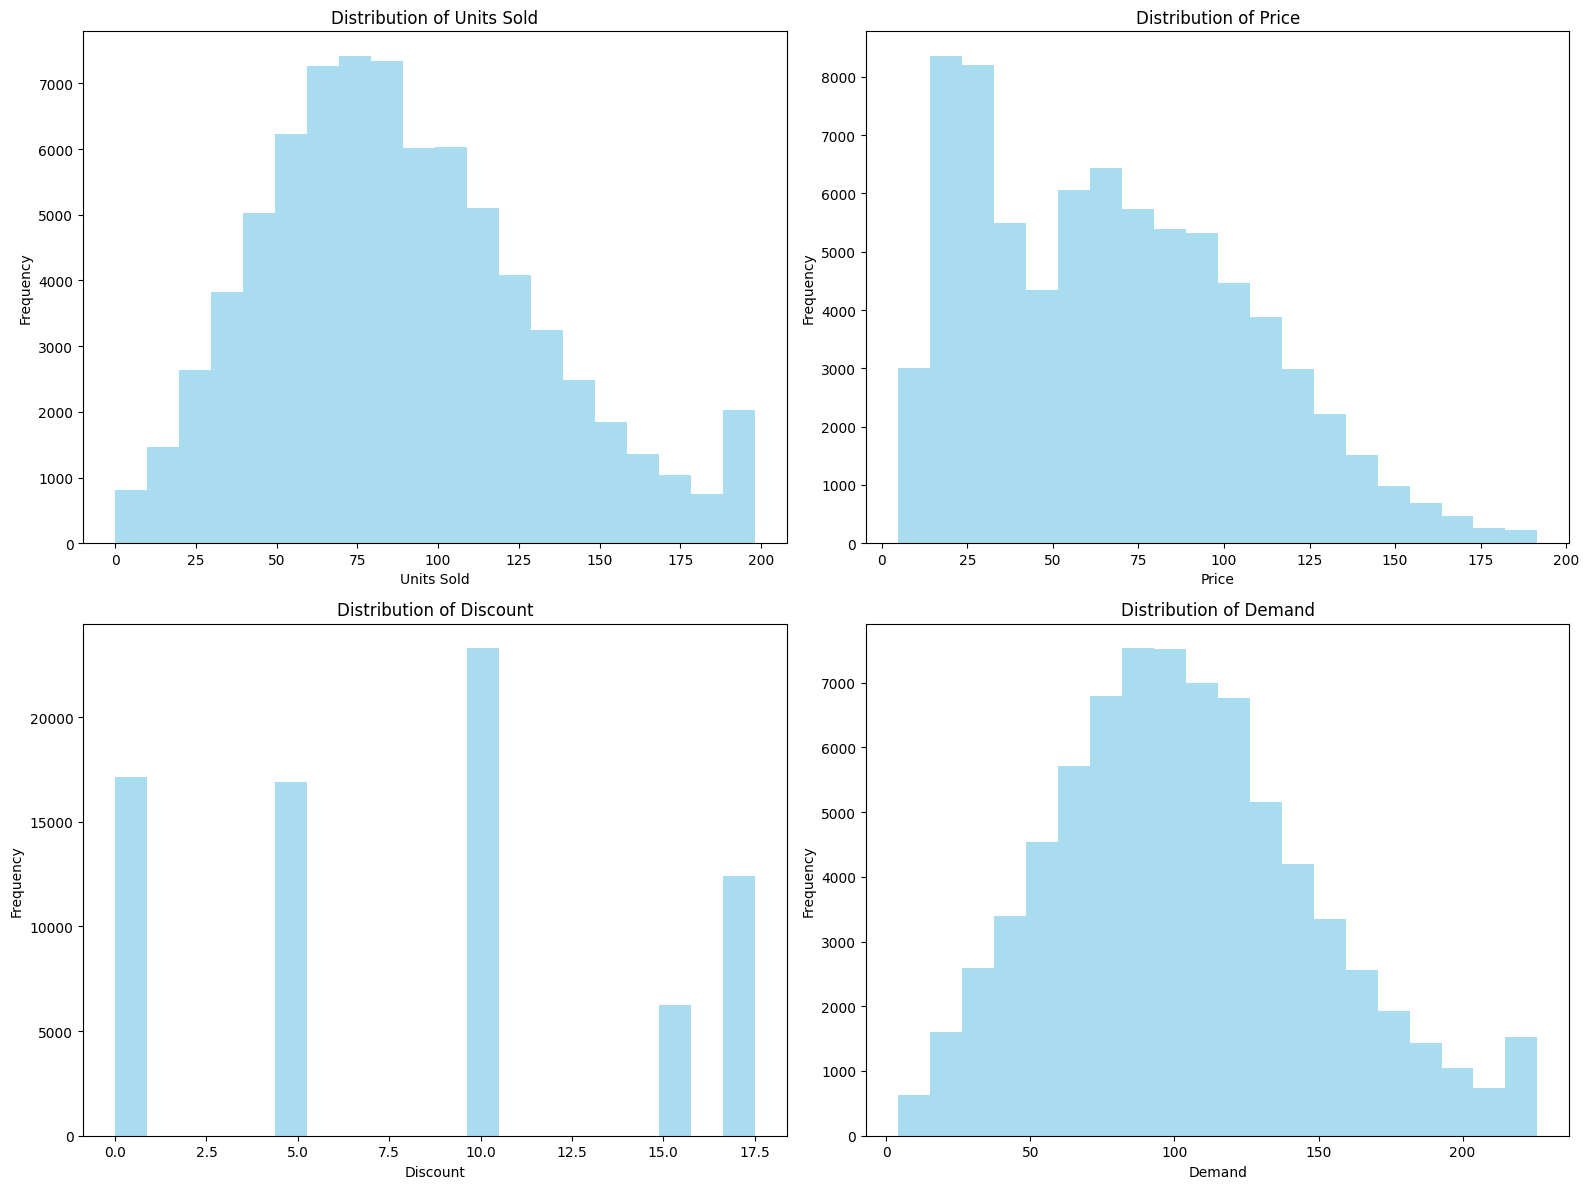

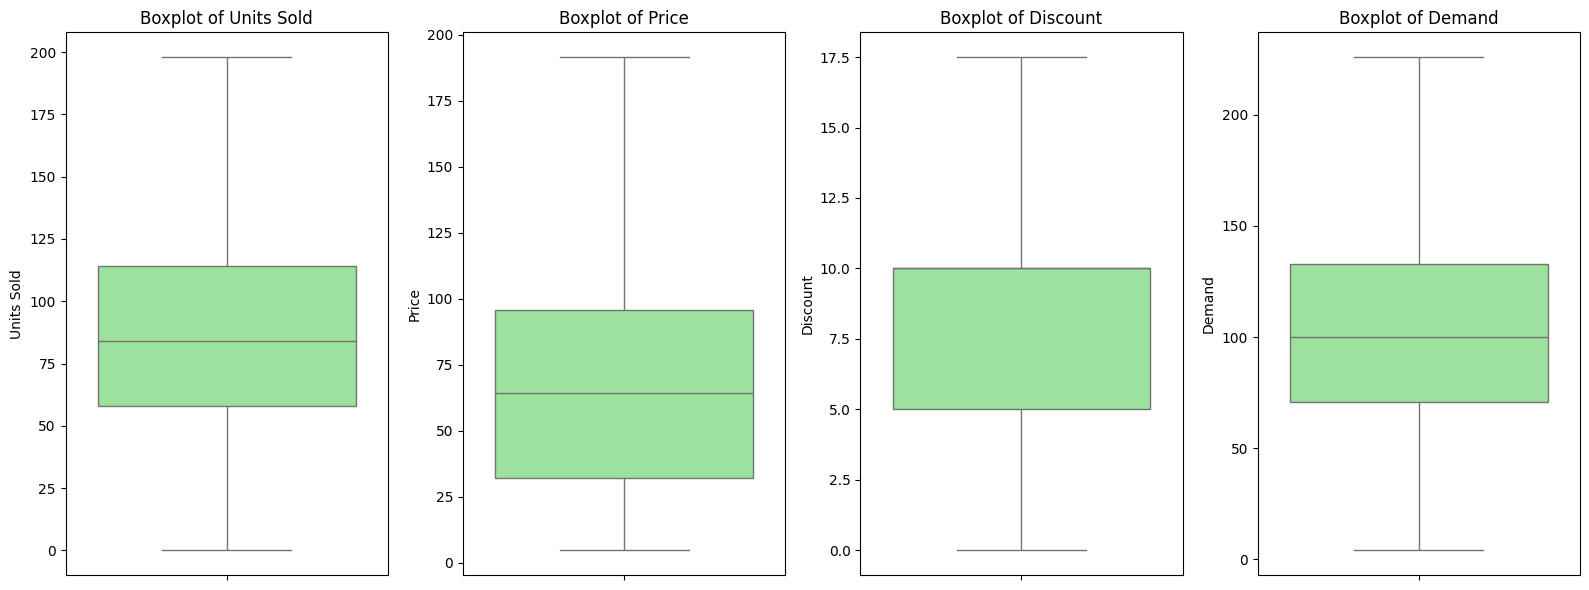

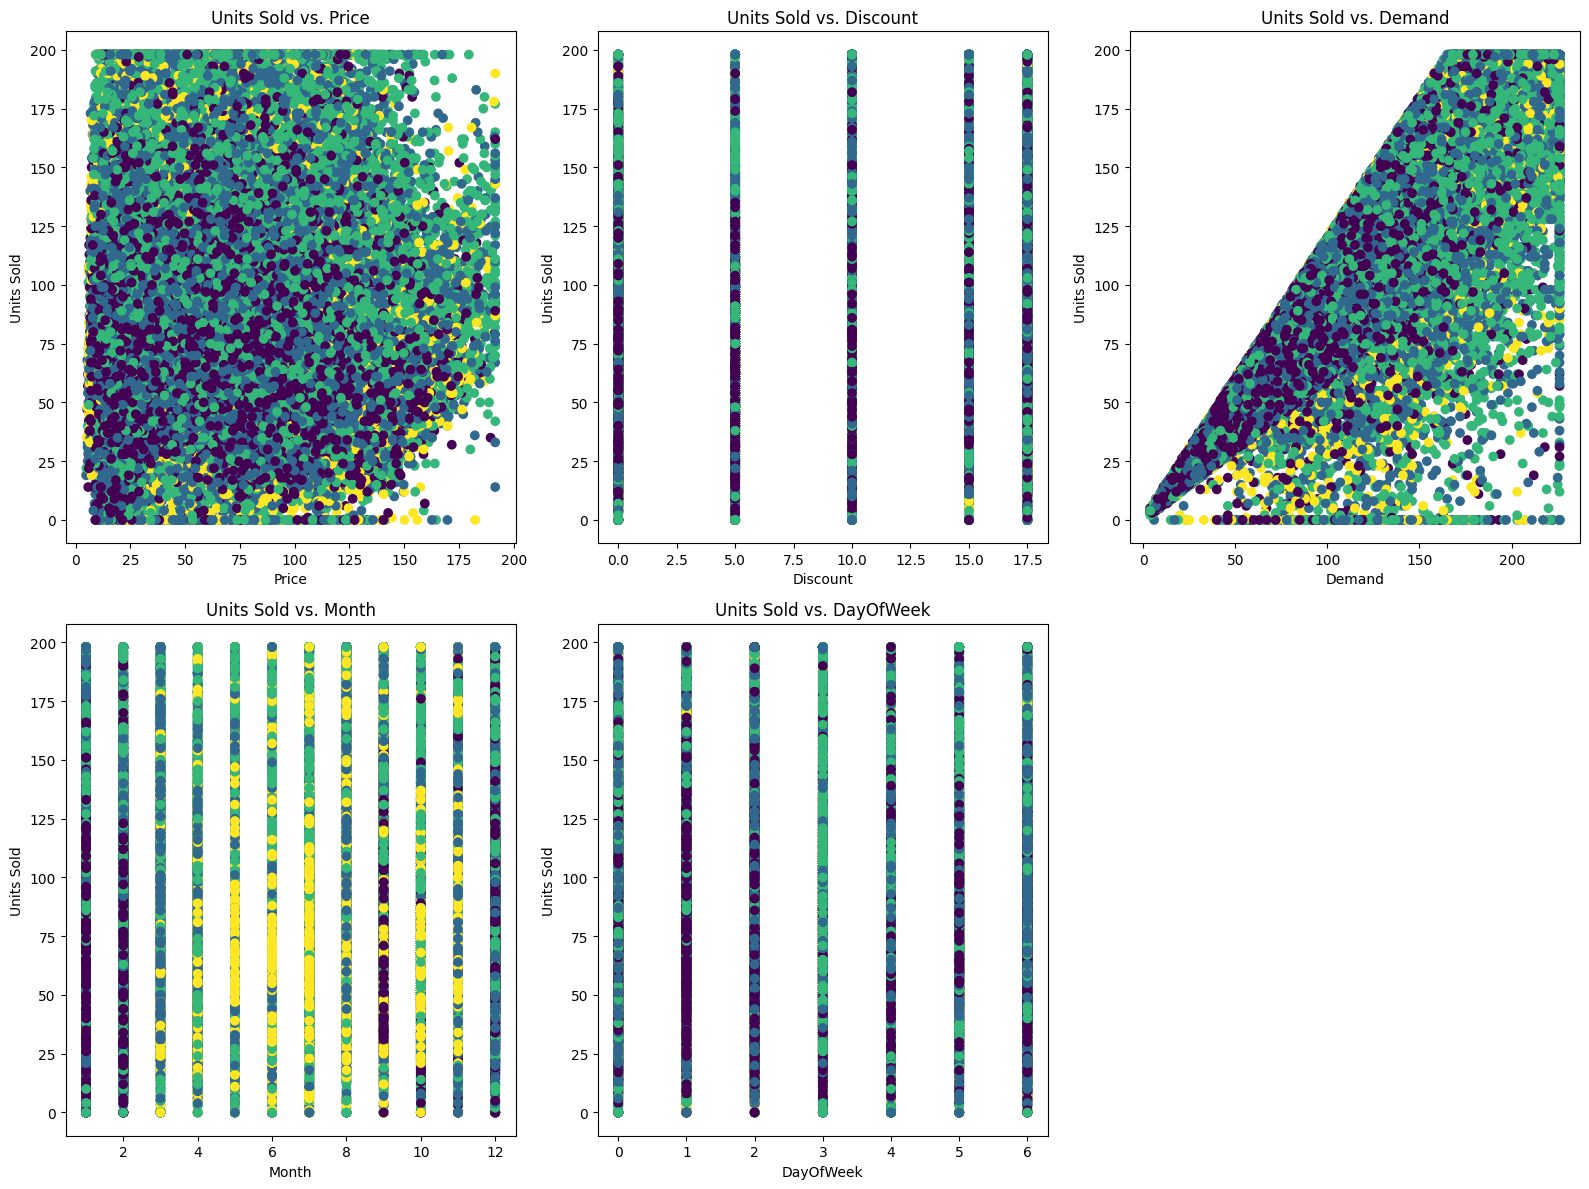

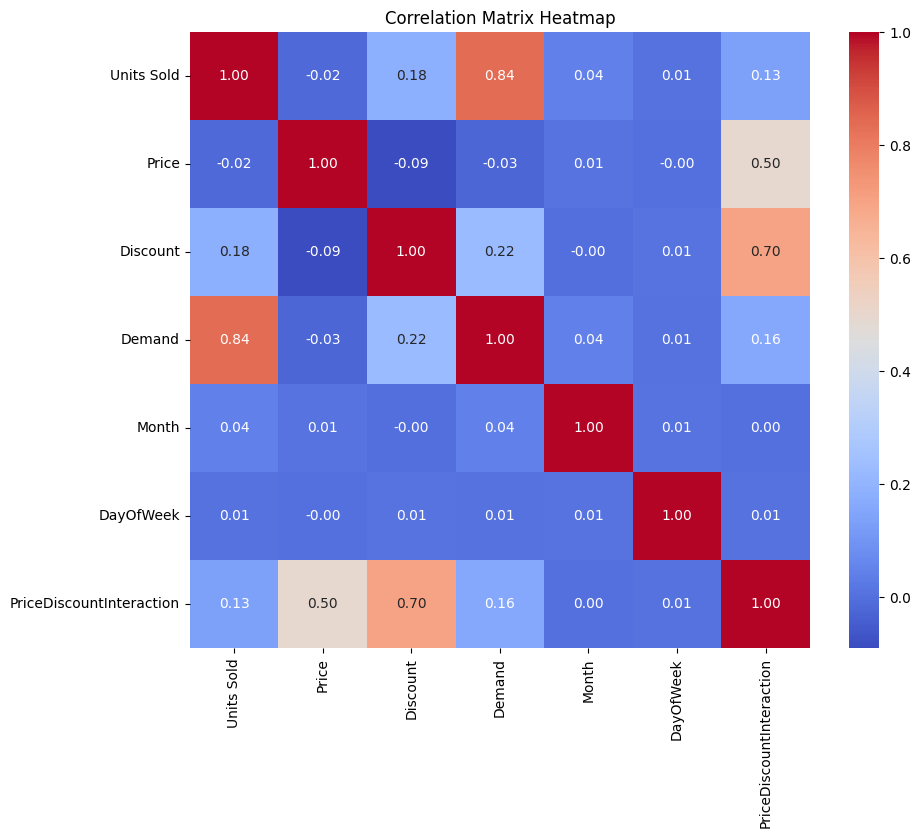

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(['Units Sold', 'Price', 'Discount', 'Demand']):
    plt.subplot(2, 2, i + 1)
    plt.hist(sales_df[col], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(16, 6))
for i, col in enumerate(['Units Sold', 'Price', 'Discount', 'Demand']):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=sales_df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Scatter plots
plt.figure(figsize=(16, 12))
for i, col in enumerate(['Price', 'Discount', 'Demand', 'Month', 'DayOfWeek']):
    plt.subplot(2, 3, i + 1)
    plt.scatter(sales_df[col], sales_df['Units Sold'], c=sales_df['Weather Condition'].astype('category').cat.codes, cmap='viridis')
    plt.title(f'Units Sold vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()


# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = sales_df[['Units Sold', 'Price', 'Discount', 'Demand', 'Month', 'DayOfWeek', 'PriceDiscountInteraction']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Data analysis

### Subtask:
Perform statistical analysis on the sales data to understand relationships between variables.


**Reasoning**:
Perform statistical analysis on the sales data to understand the relationships between variables, as per the instructions.  Calculate correlations, perform t-tests/ANOVA, and segment the data for analysis.



In [ ]:
import scipy.stats as stats

# 1. Correlation and Statistical Tests
correlation_matrix = sales_df[['Units Sold', 'Price', 'Discount', 'Demand', 'Month', 'DayOfWeek', 'PriceDiscountInteraction']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# T-tests or ANOVA for categorical features
for col in ['Region', 'Category', 'Weather Condition', 'Seasonality']:
    groups = sales_df.groupby(col)['Units Sold'].apply(list)
    if len(groups) > 2:  # ANOVA for more than two groups
        fvalue, pvalue = stats.f_oneway(*groups)
        print(f"\nANOVA test for {col}:")
        print(f"F-value: {fvalue:.2f}, P-value: {pvalue:.3f}")
    else:  # T-test for two groups
        group1 = groups.iloc[0]
        group2 = groups.iloc[1]
        tvalue, pvalue = stats.ttest_ind(group1, group2)
        print(f"\nT-test for {col}:")
        print(f"T-value: {tvalue:.2f}, P-value: {pvalue:.3f}")


# 2. Data Segmentation and Descriptive Statistics
for col in ['Region', 'Category', 'Month']:
    segment_stats = sales_df.groupby(col)['Units Sold'].describe()
    print(f"\nDescriptive Statistics for 'Units Sold' by {col}:\n", segment_stats)

# 3. Promotion Impact
promotion_stats = sales_df.groupby('Promotion')['Units Sold'].describe()
print(f"\nDescriptive Statistics for 'Units Sold' by Promotion:\n", promotion_stats)
tvalue, pvalue = stats.ttest_ind(sales_df[sales_df['Promotion'] == 0]['Units Sold'],
                                 sales_df[sales_df['Promotion'] == 1]['Units Sold'])
print(f"\nT-test for Promotion Impact:")
print(f"T-value: {tvalue:.2f}, P-value: {pvalue:.3f}")

# 4. Competitor Pricing Impact (simplified example)
correlation_cp = sales_df['Units Sold'].corr(sales_df['Competitor Pricing'])
print(f"\nCorrelation between 'Units Sold' and 'Competitor Pricing': {correlation_cp:.3f}")

Correlation Matrix:
                           Units Sold     Price  Discount    Demand     Month  \
Units Sold                  1.000000 -0.015488  0.178902  0.835861  0.044422   
Price                      -0.015488  1.000000 -0.089700 -0.025190  0.012001   
Discount                    0.178902 -0.089700  1.000000  0.221665 -0.004379   
Demand                      0.835861 -0.025190  0.221665  1.000000  0.042991   
Month                       0.044422  0.012001 -0.004379  0.042991  1.000000   
DayOfWeek                   0.006101 -0.000235  0.011892  0.007146  0.011483   
PriceDiscountInteraction    0.133510  0.497368  0.701369  0.159455  0.003647   

                          DayOfWeek  PriceDiscountInteraction  
Units Sold                 0.006101                  0.133510  
Price                     -0.000235                  0.497368  
Discount                   0.011892                  0.701369  
Demand                     0.007146                  0.159455  
Month             

## Summary:

### Q&A
There were no explicit questions in the task description. However, the analysis implicitly addresses questions about the sales data, such as the distribution of sales, the impact of promotions and competitor pricing, and the relationships between various factors and sales volume.

### Data Analysis Key Findings
* **Data Characteristics:** The dataset contains 76,000 records and 16 variables, including numerical features like sales, price, and demand, as well as categorical features such as region, weather, and season.  Outliers were present in several numerical columns and addressed via IQR capping.
* **Sales Distribution:** The distribution of 'Units Sold' and 'Demand' appear slightly right-skewed.
* **Key Relationships:**  'Units Sold' exhibits a positive correlation with 'Demand' and 'Discount' and a weak negative correlation with 'Price'. The relationship between 'Units Sold' and 'Competitor Pricing' is also examined.
* **Impact of Promotions:** Statistical analysis (t-test) revealed the impact of promotions on sales.
* **Data Segmentation:** Segmenting the data by region, category, and month provides insights into sales performance across different segments.  For example, descriptive statistics for sales were provided for each segment.
* **Weather Impact:**  Visualizations show the potential influence of weather conditions on units sold.
* **Feature Engineering:** New features like 'Month', 'DayOfWeek' and 'PriceDiscountInteraction' were created and used in the analysis.

### Insights or Next Steps
* **Investigate Seasonality:**  Further investigate the impact of seasonality on sales, perhaps by visualizing sales trends across different seasons or by creating seasonal indices.
* **Model Building:**  Develop predictive models (regression, time series) to forecast sales based on the identified relationships between variables.  For example, use the engineered features and explore more sophisticated models to improve forecasting accuracy.
